## CNN classifier for the MNIST dataset

In [ ]:
#### PACKAGE IMPORTS ####
# Run this cell first to import all required packages.
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D

from tensorflow.keras.utils import plot_model

#### The MNIST dataset

This project uses the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models.

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

Goal: construct a neural network that classifies images of handwritten digits into one of 10 classes.

## Credits
Some of the material in this notebook has been taken from the Jupyter notebooks provided in the CS 479 Course instructed by Dr. Gurman Gill.

#### Load and preprocess the data

In [ ]:
# Run this cell to load the MNIST data
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [ ]:
# Print the shape of train_images and train_labels.
print("train images: ", train_images.shape)
print("train labels: ", train_labels.shape)
print("train images: ", train_images.max())
print("train labels: ", train_labels.max())

# Print the shape of test_images and test_labels.
print("test images: ", test_images.shape)
print("test labels: ", test_labels.shape)
print("test images: ", test_images.max())
print("test labels: ", test_labels.max())

train images:  (60000, 28, 28)
train labels:  (60000,)
train images:  255
train labels:  9
test images:  (10000, 28, 28)
test labels:  (10000,)
test images:  255
test labels:  9


First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [ ]:
# Preprocess the training and test data
def scale_mnist_data(train_images, test_images):
    return (train_images/255, test_images/255)

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

#### Build the convolutional neural network model

In [ ]:
# Initialize model with an input image size
def get_model(input_shape):
    model = tf.keras.Sequential([
      Conv2D(8, kernel_size=(3,3), padding='SAME', activation='relu', input_shape=input_shape, name='layer1'),
      MaxPooling2D((2,2), name='layer2'),
      Flatten(name='layer3'),
      Dense(64, activation='relu', name='layer4'),
      Dense(64, activation='relu', name='layer5'),
      Dense(10, activation='softmax', name='layer6')
    ])

    return model

# Get the loss and accuracy function and compile the model
def compile_model(model):
    loss_f = tf.keras.losses.SparseCategoricalCrossentropy()
    accuracy_f = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0005), loss=loss_f, metrics=[accuracy_f])

#Get the desired input shape from our training data
desired_input_shape = scaled_train_images[0].shape + (1,)
print("Desired input shape: ", desired_input_shape)

# Run your function to get the model
model = get_model(desired_input_shape)
model.summary()

Desired input shape:  (28, 28, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 layer2 (MaxPooling2D)       (None, 14, 14, 8)         0         
                                                                 
 layer3 (Flatten)            (None, 1568)              0         
                                                                 
 layer4 (Dense)              (None, 64)                100416    
                                                                 
 layer5 (Dense)              (None, 64)                4160      
                                                                 
 layer6 (Dense)              (None, 10)                650       
                                                                 
Total params: 105306 (

#### Compile and Fit the model to the trainning data

In [ ]:
# Function for fitting the model with the trainning data
def train_model(model, scaled_train_images, train_labels):
    return model.fit(scaled_train_images, train_labels, epochs=5, batch_size=200)

# Run your function to compile the model
compile_model(model)

# Run your function to train the model
history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
300/300 [==============================] - 4s 4ms/step - loss: 0.5780 - sparse_categorical_accuracy: 0.8472
Epoch 2/5
300/300 [==============================] - 1s 4ms/step - loss: 0.1765 - sparse_categorical_accuracy: 0.9476
Epoch 3/5
300/300 [==============================] - 1s 5ms/step - loss: 0.1210 - sparse_categorical_accuracy: 0.9646
Epoch 4/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0956 - sparse_categorical_accuracy: 0.9716
Epoch 5/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0791 - sparse_categorical_accuracy: 0.9767


#### Plot the learning curves

In [ ]:
# Run this cell to load the model history into a pandas DataFrame
frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

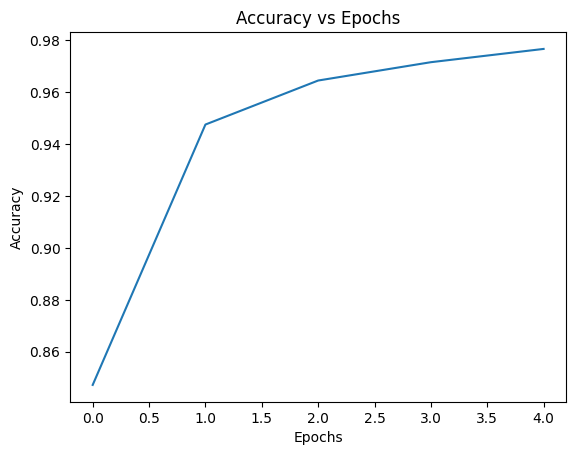

In [ ]:
# Run this cell to make the Accuracy vs Epochs plot
acc_plot = frame.plot(y="sparse_categorical_accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

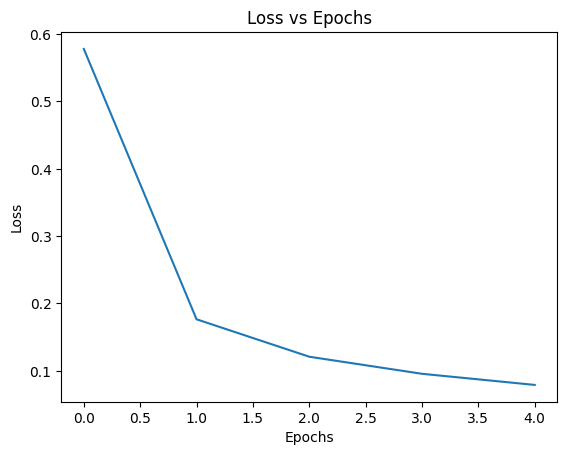

In [ ]:
# Run this cell to make the Loss vs Epochs plot
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Finally, evaluate the performance of the model on the test set, by calling the model's `evaluate` method.

In [ ]:
# Function for evaluating the model
def evaluate_model(model, scaled_test_images, test_labels):
    results = model.evaluate(scaled_test_images, test_labels, batch_size=200)
    return (results[0], results[1])

In [ ]:
# Run your function to evaluate the model
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

50/50 [==============================] - 0s 3ms/step - loss: 0.0709 - sparse_categorical_accuracy: 0.9775
Test loss: 0.0709320530295372
Test accuracy: 0.9775000214576721


#### Model predictions

Let's see some model predictions! Four images will be randomly selected from the test data and then display the image and label for each.

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

In [ ]:
# Run this cell to get a set of randomly selected test images
num_test_images = scaled_test_images.shape[0]
random_inx = np.random.choice(num_test_images, 4)

random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

print("Random Image Indecies: ", random_inx)

Random Image Indecies:  [4014 1448 2374 1203]


#### Predict on some images

Compute and return the prediction on a specific set of images by calling the model's `predict` method.

In [ ]:
# Run this cell to get model predictions on randomly selected test images.
def predict_from_model(model, test_images):
    return model.predict(test_images)

predictions = predict_from_model(model, random_test_images)

1/1 [==============================] - 0s 117ms/step


Plot the output of the `softmax` function on each random test image

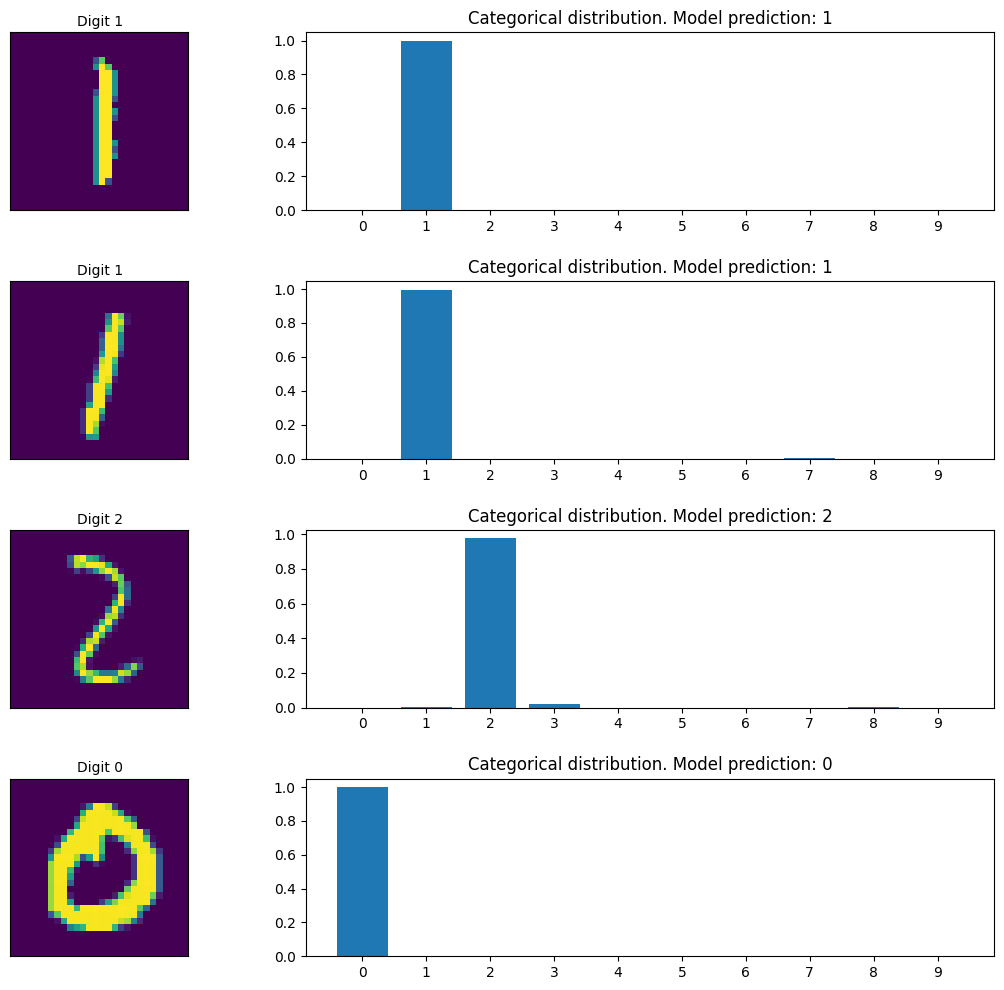

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, gt_label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {gt_label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

plt.show()

###Conclusion:

With a relatively simple CNN, very high accuracy results can be achieved as can be seen by the above predictions using the testing data.